In [5]:
import matplotlib, pickle
import numpy as np
import matplotlib.pyplot as plt
from pystan import stan

matplotlib.style.use('ggplot')
%matplotlib inline

In [6]:
class transit():

    def __init__(self,num_samples,A,B,t_c,w,sigma):
        self.num_samples = num_samples
        self.A = A
        self.B = B
        self.t_c = t_c
        self.w = w
        self.sigma = sigma

    def generate_data(self):
        self.t_sample = np.arange(self.num_samples)
        self.data = np.zeros(self.num_samples)
        
        for i,t in enumerate(self.t_sample):
            if (t<self.t_c-self.w/2.) or (t>self.t_c+self.w/2.):
                self.data[i] = np.random.normal(self.A,self.sigma,1)
                
            else: 
                self.data[i] = np.random.normal(self.A-self.B,self.sigma,1)

        return self.t_sample, self.data

    def plot_data(self,file_name):
        fig = plt.figure(figsize=(10,10))
        ax = fig.add_subplot(111)
        ax.set_title('Mock transit data')
        ax.set_ylabel('Luminosity (AU)')
        ax.set_xlabel('Time (AU)')
        ax.scatter(self.t_sample, self.data)
        fig.savefig(file_name,bbox_inches='tight')
        return fig

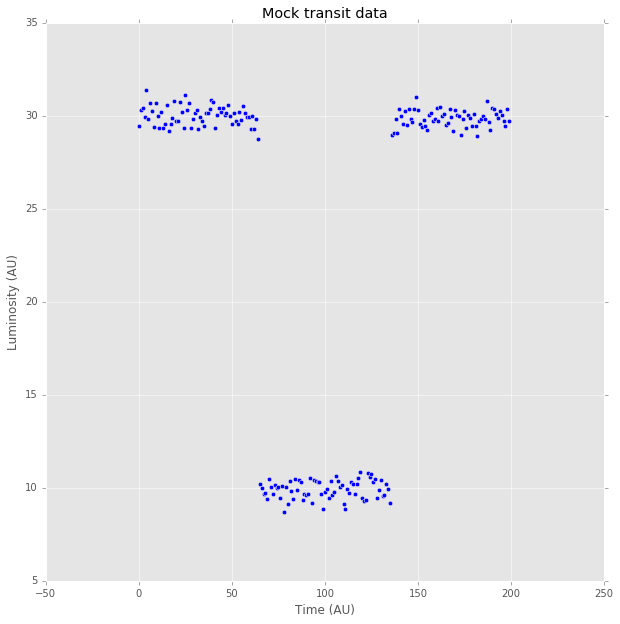

In [7]:
"""
num_samples : number of samples
A : amplitude of mean signal
A - b : amplitude of mean signal during transit
t_c : time of mid-transit
w : width of transit
sigma : spread of noise

"""

num_samples = 200
A = 30
B = 20
t_c = 100
w = 70
sigma = 0.5 

trans = transit(num_samples,A,B,t_c,w,sigma)
data = trans.generate_data()
np.savetxt('mock_transit_data.txt',np.c_[data[0],data[1]])
fig = trans.plot_data('mock_data_plot.png')

In [15]:
data = np.loadtxt('mock_transit_data.txt',unpack=True)

stan_data = {

    'N' : data[0].size,
    't' : data[0],
    'L' : data[1]

}

fit = stan(file='transit_model.stan', data=stan_data, iter=10000, chains=10)

results = fit.extract(permuted=True)

with open('fit_results.pickle', 'wb') as handle:
  pickle.dump(results, handle)

fit.plot()
plt.show()

RuntimeError: 
Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception thrown at line 33: stan::math::uniform_log: Upper bound parameter is 1, but must be greater than 25
If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Rejecting initial value:
  Error evaluating the log probability at the initial value.


Initialization between (--2, -2) failed after 100 attempts. 
 Try specifying initial values, reducing ranges of constrained values, or reparameterizing the model.
